In [1]:
#Gerekli Kütüphanleri import ettim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
#Veri'yi Hazırladım.
data=pd.read_csv("top_six_economies.csv")
cap=["Unnamed: 0","Country Name"]
data.drop(cap,axis=1,inplace=True)
data.head()

,Year,GDP (current US$),"GDP, PPP (current international $)",GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Central government debt, total (% of GDP)","Total reserves (includes gold, current US$)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)","Personal remittances, received (% of GDP)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)",Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)
0,1991,6.158129e+12,6.158129e+12,24342.258905,-0.108265,10.125543,9.660905,44.061597,1.592729e+11,6.80,4.234964,0.021110,252981000.0,1.336261,75.365854,0.5
1,1992,6.520327e+12,6.520327e+12,25418.990776,3.522441,10.241680,9.708915,46.050144,1.475259e+11,7.50,3.028820,0.027545,256514000.0,1.386886,75.617073,0.5
2,1993,6.858559e+12,6.858559e+12,26387.293734,2.751781,10.497438,9.547180,48.246140,1.646202e+11,6.90,2.951657,0.026536,259919000.0,1.318680,75.419512,0.5
3,1994,7.287236e+12,7.287236e+12,27694.853416,4.028793,11.162312,9.893147,47.353482,1.635906e+11,6.12,2.607442,0.026663,263126000.0,1.226296,75.619512,0.5
4,1995,7.639749e+12,7.639749e+12,28690.875701,2.684217,11.814158,10.639224,47.209535,1.759954e+11,5.65,2.805420,0.028522,266278000.0,1.190787,75.621951,0.5


<AxesSubplot:>

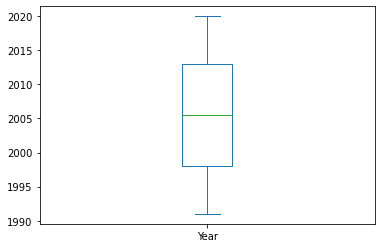

In [3]:
#Year sütununda bulunan aykırı verileri inceledim
data["Year"].plot(kind="box")

In [4]:
#Data'da bulunan boş değerleri, o sütunda bulunan değerlerin ortalamasını yazdırdım
data["Central government debt, total (% of GDP)"].fillna(data["Central government debt, total (% of GDP)"].mean(),inplace=True)
data["Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)"].fillna(data["Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)"].mean(),inplace=True)

In [5]:
#Data'da boş değer var mı yok mu onu kontrol ettim.
data.isnull().sum()

Year                                                                   0
GDP (current US$)                                                      0
GDP, PPP (current international $)                                     0
GDP per capita (current US$)                                           0
GDP growth (annual %)                                                  0
Imports of goods and services (% of GDP)                               0
Exports of goods and services (% of GDP)                               0
Central government debt, total (% of GDP)                              0
Total reserves (includes gold, current US$)                            0
Unemployment, total (% of total labor force) (modeled ILO estimate)    0
Inflation, consumer prices (annual %)                                  0
Personal remittances, received (% of GDP)                              0
Population, total                                                      0
Population growth (annual %)                       

In [6]:
#Datamızın boyutuna baktım
data.shape

(180, 16)

In [7]:
#Bağımlı ve Bağımsız Değişkenleri oluşturdum
x=data.drop("Year",axis=1)
y=data[["Year"]]

In [8]:
#Test ve Eğitim kümelerine ayırdım
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [9]:
#GridSearchCV yöntemi ile en uygun n_estimators değerini buldum.
rf=RandomForestRegressor(random_state=42)
rf_param={"n_estimators":np.arange(1,100,1)}
gsv=GridSearchCV(rf,rf_param,cv=10,n_jobs=-1).fit(x_train,y_train.values.ravel())
print(gsv.best_params_)

{'n_estimators': 94}


In [10]:
#Sonuç;
rf=RandomForestRegressor(n_estimators=94,random_state=42).fit(x_train,y_train.values.ravel())
pred=rf.predict(x_test)
print("Accuracy:",r2_score(y_test,pred))

Accuracy: 0.9030585096518012
